# Defining a target with multiple stocks
## Goal
* Quantify how good our models have to be if we have one model for each stock in Dow Jones
* In this set up, each model is trying to predict if the asset is going to be higher in exactly 20 mins when compared to the next minute.
* Need to also track the percentage of succesfull moves, maybe from market utilities.

## Main takeouts



In [ ]:
cd ~/Desktop/MyProjects/moneyManager/

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from modelBenchMark.strategySimulator import strategySimulator, simulateSingleStrategy
from modelBenchMark.strategySimulator import testCaseForModelSimulator
from marketUtilities.marketSimulator import marketSimulator
from marketUtilities.loadTimeSeries import loadTimeSeries
from datetime import datetime

In [ ]:
def createTarget(consolidatedPrice, memSize=120):
    """ Document asap
    """
    d=(consolidatedPrice.shift(-20)-consolidatedPrice.shift(-1))
    #rollingMean = d.rolling(memSize).mean() 
    return (d>0)

In [ ]:
def getGainOfOnlyOneStockStrategy(stock, startDay, endDay):
    marketTimes = loadTimeSeries(stock, startDay, endDay).index
    onlyOne = pd.Series([stock]*len(marketTimes), index=marketTimes)
    return marketSimulator(onlyOne, initialAmount=1)[-1]

In [ ]:
startDay, endDay = datetime(2019,1,1), datetime(2020,1,1)
stocks=['GS', 'MSFT', 'IBM'] 
numSimulations = 100

In [6]:
stratOutcome, stratMoves, stratPosIncreases = strategySimulator(0.55, 0.05, stocks, startDay, endDay, createTarget, numSimulations)
randOutcome, randMoves, randPosIncreases = strategySimulator(0.5, 0.5, stocks, startDay, endDay, createTarget, numSimulations)

........................................................................................................................................................................................................

Text(0.5, 1.0, 'Performance of strategy ')

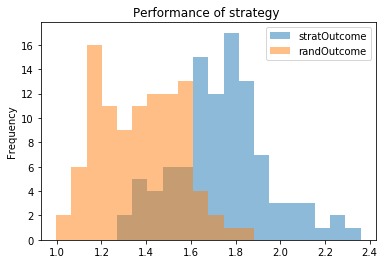

In [12]:
dr = pd.DataFrame({'stratOutcome':stratOutcome, 'randOutcome': randOutcome})
dr.plot.hist(bins=20, alpha=0.5);
plt.title('Performance of strategy ')

Text(0.5, 1.0, 'Number of movements')

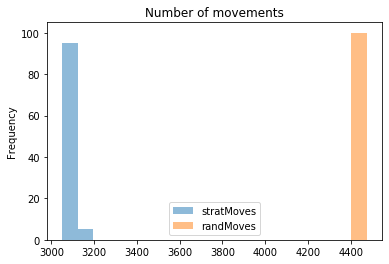

In [13]:
dm = pd.DataFrame({'stratMoves':stratMoves, 'randMoves': randMoves})
dm.plot.hist(bins=20, alpha=0.5);
plt.title('Number of movements')

Text(0.5, 1.0, 'Percentage of positive increases')

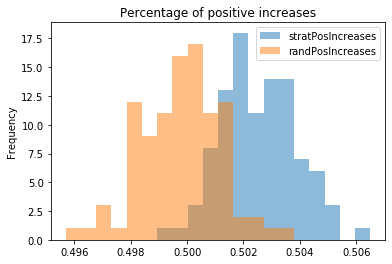

In [14]:
dm = pd.DataFrame({'stratPosIncreases':stratPosIncreases, 'randPosIncreases': randPosIncreases})
dm.plot.hist(bins=20, alpha=0.5);
plt.title('Percentage of positive increases')

In [15]:
# just checks how was the gain of GS, IBM, MSFT
winGS = getGainOfOnlyOneStockStrategy('GS', startDay, endDay)
winIBM = getGainOfOnlyOneStockStrategy('IBM', startDay, endDay)
winMSFT = getGainOfOnlyOneStockStrategy('MSFT', startDay, endDay)
print(winGS, winIBM, winMSFT)

1.4279697238153024 1.2532322094050923 1.6108618098927572


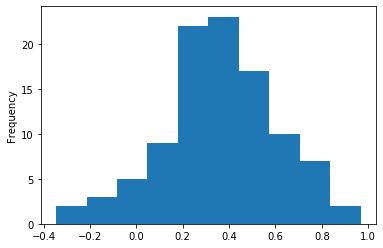

In [16]:
difference = dr.stratOutcome-dr.randOutcome
difference.plot.hist()